In [ ]:
#https://pypi.org/project/grad-cam/1.2.3/

In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import timm
import argparse
import models_vit
import numpy as np
from util.misc import NativeScalerWithGradNormCount as NativeScaler
from util.lars import LARS
import util.misc as misc
import os
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import sys
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
#from pytorch_grad_cam import DeepFeatureFactorization

C:\Users\kcs163\Anaconda3\envs\ml\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#sys.path.append('./pytorch-grad-cam-master')

In [3]:
def reshape_transform(tensor, height=14, width=14):
    result = tensor[:, 1 :  , :].reshape(tensor.size(0),
        height, width, tensor.size(2))

    # Bring the channels to the first dimension,
    # like in CNNs.
    result = result.transpose(2, 3).transpose(1, 2)
    return result

In [4]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [5]:
os.getcwd()

'C:\\Users\\kcs163\\works\\git_repos\\ADL-MAE\\practise\\final'

In [6]:
class Args:
    model = 'vit_base_patch16'
    weight_decay = 0
    lr = None
    resume = '../tmp/checkpoint/checkpoint-100_1blk.pth'
    eval = True
    data_path = '../mae-main/dataset/imagenette2-320/'
args = Args()

In [7]:
model = models_vit.__dict__[args.model]( num_classes=10,  global_pool=False)
model.head = torch.nn.Sequential(torch.nn.BatchNorm1d(model.head.in_features, affine=False, eps=1e-6), model.head)

In [8]:
checkpoint = torch.load(args.resume, map_location='cpu')
model.load_state_dict(checkpoint['model'])
print(1)

1


In [9]:
transform_val = transforms.Compose([
        #transforms.Resize(256, interpolation=3),
        #transforms.CenterCrop(224),
        transforms.Resize((224,224), interpolation=3),
        transforms.ToTensor(),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
dataset_val = datasets.ImageFolder(os.path.join(args.data_path, 'val'), transform=transform_val)
data_loader_val = torch.utils.data.DataLoader( dataset_val, batch_size=1, num_workers=0, drop_last=False)

C:\Users\kcs163\Anaconda3\envs\ml\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [10]:
#Can be GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM
cam = GradCAM(model=model, target_layer=model.blocks[-1].norm1, reshape_transform=reshape_transform, use_cuda=True)

C:\Users\kcs163\Anaconda3\envs\ml\lib\site-packages\torch\nn\modules\module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


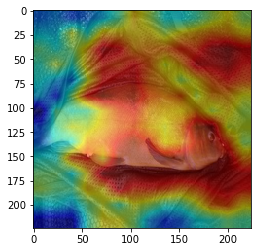

In [11]:
i = 2
img0 = dataset_val[i][0]
img = img0.permute(1,2,0)
grayscale_cam = cam(input_tensor=img0[None,:])
visualization = show_cam_on_image(img.numpy(), grayscale_cam.squeeze())
plt.imshow(visualization, interpolation='nearest')

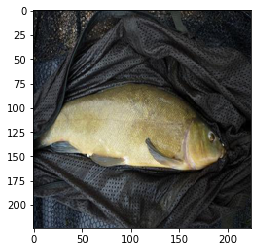

In [12]:
plt.imshow(img, interpolation='nearest')

In [13]:
#plt.imshow(visualization, interpolation='nearest')

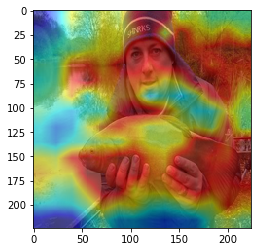

In [15]:
i = 3
img0 = dataset_val[i][0]
img = img0.permute(1,2,0)
grayscale_cam = cam(input_tensor=img0[None,:])
visualization = show_cam_on_image(img.numpy(), grayscale_cam.squeeze())
plt.imshow(visualization, interpolation='nearest')

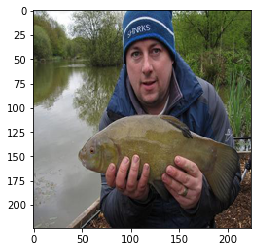

In [16]:
plt.imshow(img, interpolation='nearest')

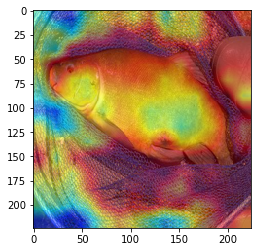

In [17]:
i = 5
img0 = dataset_val[i][0]
img = img0.permute(1,2,0)
grayscale_cam = cam(input_tensor=img0[None,:])
visualization = show_cam_on_image(img.numpy(), grayscale_cam.squeeze())
plt.imshow(visualization, interpolation='nearest')

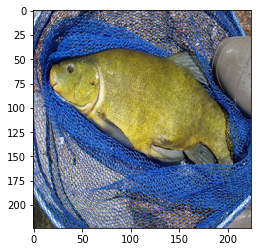

In [18]:
plt.imshow(img, interpolation='nearest')